<a href="https://colab.research.google.com/github/np03cs4a240319-eng/Concept-and-Technology-of-AI-Final-Assessment/blob/main/WLVID_DivyaniKhatri_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

sns.set(style="whitegrid")


In [2]:
import pandas as pd

df = pd.read_excel("/content/Dry_Bean_Dataset.csv")
df.head()



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
df.describe()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
df.isnull().sum()


,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [6]:
df.duplicated().sum()


np.int64(68)

In [7]:
# Remove duplicates
df = df.drop_duplicates()


In [8]:
df['Class'].value_counts()


,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1860
CALI,1630
BARBUNYA,1322
BOMBAY,522


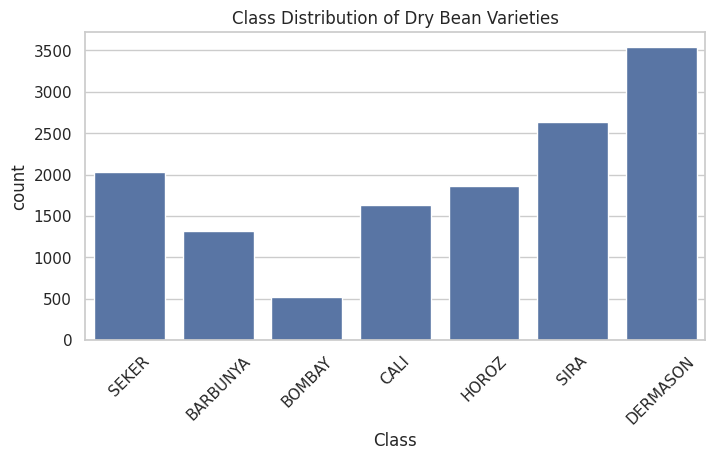

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution of Dry Bean Varieties")
plt.xticks(rotation=45)
plt.show()


In [10]:
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])


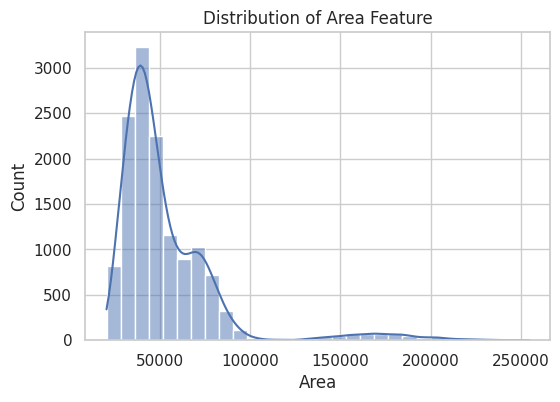

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['Area'], bins=30, kde=True)
plt.title("Distribution of Area Feature")
plt.show()


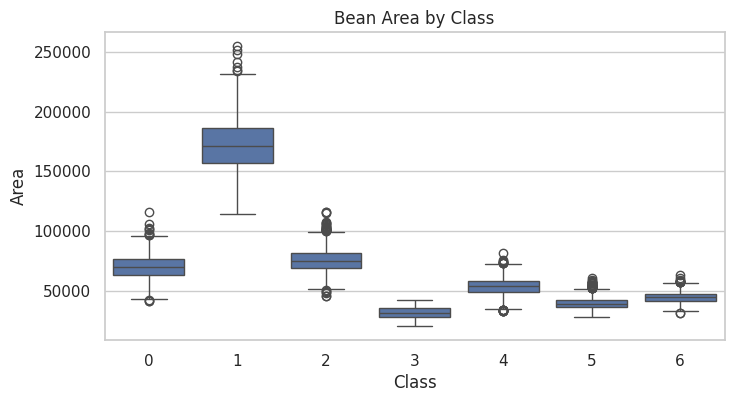

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Area', data=df)
plt.title("Bean Area by Class")
plt.show()


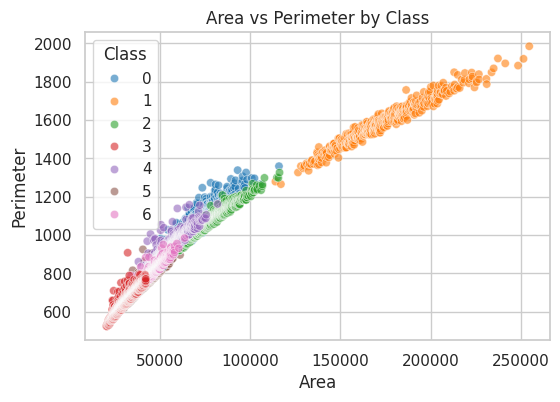

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Area',
    y='Perimeter',
    hue='Class',
    data=df,
    palette='tab10',
    alpha=0.6
)
plt.title("Area vs Perimeter by Class")
plt.show()


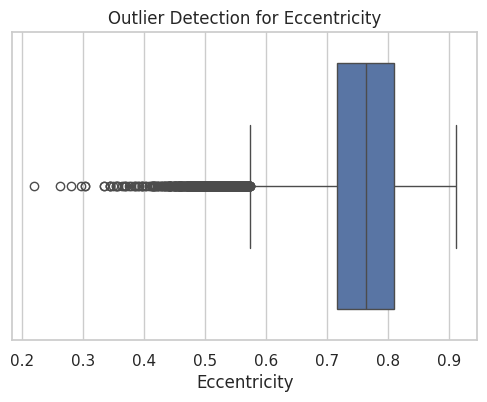

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Eccentricity'])
plt.title("Outlier Detection for Eccentricity")
plt.show()


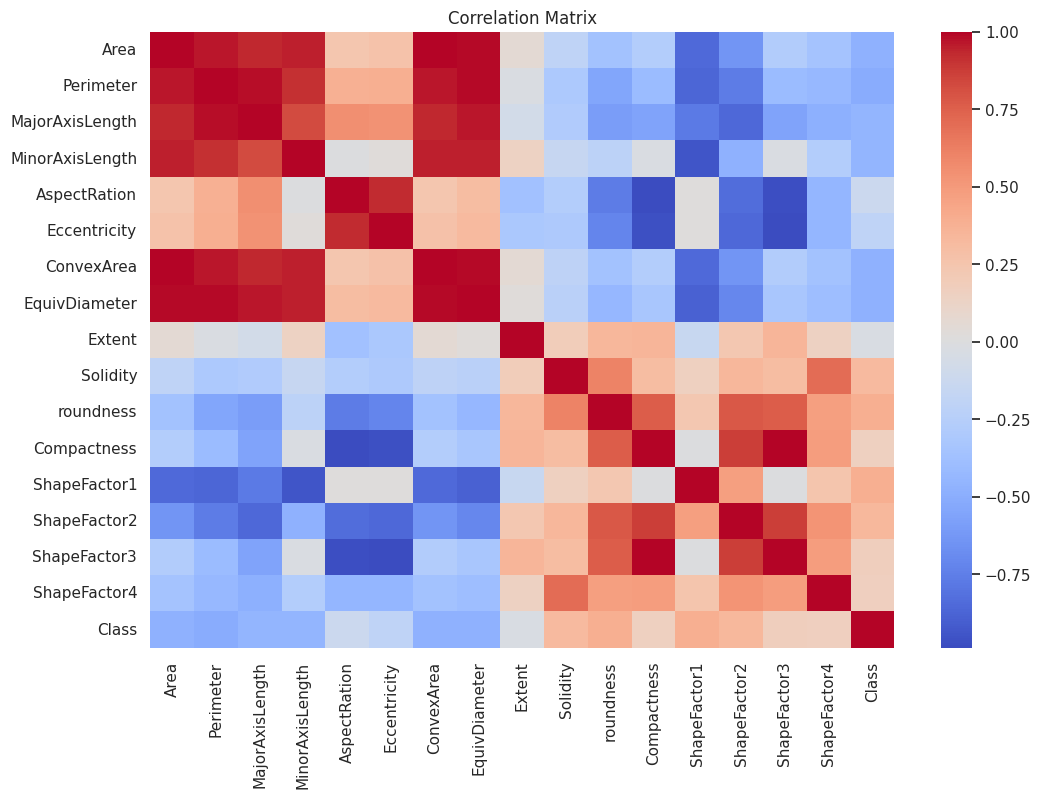

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
mlp_pred = mlp.predict(X_test_scaled)


In [19]:
print("MLP Classifier Performance")
print(classification_report(y_test, mlp_pred))


MLP Classifier Performance
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       265
           1       1.00      1.00      1.00       104
           2       0.94      0.94      0.94       326
           3       0.92      0.94      0.93       709
           4       0.96      0.95      0.95       372
           5       0.94      0.96      0.95       406
           6       0.89      0.86      0.88       527

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709



In [20]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)


In [21]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [22]:
lr_params = {'C': [0.01, 0.1, 1, 10]}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_params,
    cv=5,
    scoring='f1_weighted'
)

lr_grid.fit(X_train_scaled, y_train)

lr_grid.best_params_, lr_grid.best_score_


({'C': 10}, np.float64(0.9251242114919804))

In [23]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='f1_weighted'
)

rf_grid.fit(X_train, y_train)

rf_grid.best_params_, rf_grid.best_score_


({'max_depth': 10, 'n_estimators': 200}, np.float64(0.9234727382194556))

In [24]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='f1_weighted'
)

rf_grid.fit(X_train, y_train)

rf_grid.best_params_, rf_grid.best_score_


({'max_depth': 10, 'n_estimators': 200}, np.float64(0.9234727382194556))

In [29]:
selector = SelectKBest(score_func=f_classif, k=8)

X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

X_train_fs_scaled = scaler.fit_transform(X_train_fs)
X_test_fs_scaled = scaler.transform(X_test_fs)


In [26]:
final_lr = LogisticRegression(**lr_grid.best_params_, max_iter=1000)
final_lr.fit(X_train_fs_scaled, y_train)
final_lr_pred = final_lr.predict(X_test_fs_scaled)


In [27]:
final_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
final_rf.fit(X_train_fs, y_train)
final_rf_pred = final_rf.predict(X_test_fs)


In [28]:
results = pd.DataFrame({
    "Model": ["Neural Network", "Logistic Regression", "Random Forest"],
    "CV Score": [
        "-",
        lr_grid.best_score_,
        rf_grid.best_score_
    ],
    "Accuracy": [
        accuracy_score(y_test, mlp_pred),
        accuracy_score(y_test, final_lr_pred),
        accuracy_score(y_test, final_rf_pred)
    ],
    "Precision": [
        precision_score(y_test, mlp_pred, average='weighted'),
        precision_score(y_test, final_lr_pred, average='weighted'),
        precision_score(y_test, final_rf_pred, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, mlp_pred, average='weighted'),
        recall_score(y_test, final_lr_pred, average='weighted'),
        recall_score(y_test, final_rf_pred, average='weighted')
    ],
    "F1 Score": [
        f1_score(y_test, mlp_pred, average='weighted'),
        f1_score(y_test, final_lr_pred, average='weighted'),
        f1_score(y_test, final_rf_pred, average='weighted')
    ]
})

results


,Model,CV Score,Accuracy,Precision,Recall,F1 Score
0,Neural Network,-,0.928018,0.927863,0.928018,0.927865
1,Logistic Regression,0.925124,0.911037,0.911927,0.911037,0.911199
2,Random Forest,0.923473,0.899225,0.899884,0.899225,0.898905
